In [1]:
%matplotlib inline
import pandas as pd #for datasets management
from scipy.stats import pearsonr
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#el archivo debe estar en la misma dirección que el tester
db_original = 'exams.csv'
db = pd.read_csv(db_original)
db.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group D,some college,standard,completed,59,70,78
1,male,group D,associate's degree,standard,none,96,93,87
2,female,group D,some college,free/reduced,none,57,76,77
3,male,group B,some college,free/reduced,none,70,70,63
4,female,group D,associate's degree,standard,none,83,85,86


In [ ]:
print(db.dtypes) #tipos de datos en cada una de las columnas
print(db.shape) #cantidad de filas y columnas

In [3]:
pd.isnull(db).sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

# Talk to me...

C:\Users\luisr\AppData\Local\Temp\ipykernel_14576\361865887.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(db.corr())


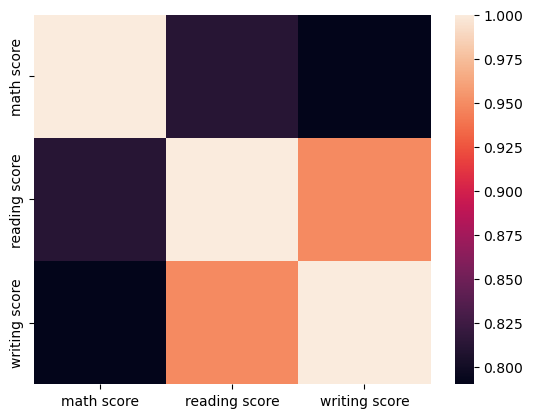

In [9]:
sns.heatmap(db.corr())
plt.show()

In [ ]:
db.columns

In [ ]:
#print(db.corr()) #correlaciones entre TODAS las variables
print(db.corr()['INGRESOS_OPERACIONALES_2017']) #correlaciones entre variable determinada y todas las variables

In [ ]:
corr = pearsonr(db['INGRESOS_OPERACIONALES_2017'], db['TOTAL_PASIVOS_2018']) #ingresos/patrimonio_17
print(corr)